In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal

In [2]:
path1 = "Data.xlsx"
path2 = "Data_GMM.xlsx"

# Data 1 Visualization

In [3]:
#Data 
df1 = pd.read_excel(path1)
df1 = df1.sample(frac = 1)

In [4]:
df1

,Result 1,Result 2
136,5.6,2.4
87,4.4,1.3
40,1.3,0.3
26,1.6,0.4
143,5.9,2.3
...,...,...
130,6.1,1.9
43,1.6,0.6
28,1.4,0.2
86,4.7,1.5


In [5]:
#Maximum and Minimum values of Result 1 in Data1 
print(df1['Result 1'].max(), " ", df1['Result 1'].min())

6.9   1.0


In [6]:
#Maximum and Minimum values of Result 2 in Data1 
print(df1['Result 2'].max(), " ", df1['Result 2'].min())

2.5   0.1


In [7]:
#Feature matrix for Data1
X1 = df1['Result 1'].to_numpy()
X1.shape

(150,)

In [8]:
#Feature matrix for Data1
X2 = df1['Result 2'].to_numpy()
X2.shape

(150,)

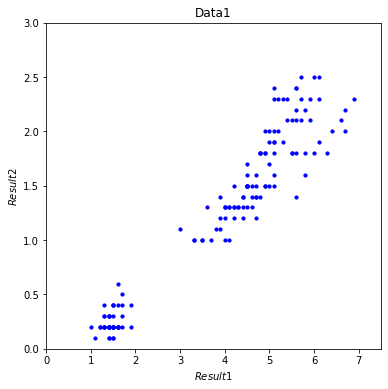

In [9]:
#Scatter Plot for Data1
fig = plt.figure(figsize = (6, 6))
plt.scatter(X1, X2, s = 10, c = "blue")  
plt.xlim(0.0, 7.5)
plt.ylim(0.0, 3.0)
plt.ylabel(r'$Result 2$')
plt.xlabel(r'$Result 1$')
plt.title("Data1") 
#plt.savefig("C:\Me\sem6\cll788\A4\Data1_scatter.jpeg")
plt.show()

# K Means

In [10]:
#Number if clusters
k = 2

In [11]:
#Cluster array
groups = {}
for i in range(k):
    groups[i] = []

In [12]:
#Random Centroid
centroid = []
for i in range(k):
    centroid.append([X1[i], X2[i]])
centroid

[[5.6, 2.4], [4.4, 1.3]]

In [13]:
#Number of data points
m = X1.shape[0]
m

150

In [14]:
#Tolerance and maximum iteration for the algorithm
tol = 0.000001
max_iter = 1000

In [15]:
#k-means implementation
for j in range(max_iter):
    
    if(j!=0 and (cen_difx1<=tol and cen_difx2<=tol and cen_dify1<=tol and cen_dify2<=tol)):
        centroid[0][0] = c1x
        centroid[0][1] = c1y
        centroid[1][0] = c2x
        centroid[1][1] = c2y
        groups[0].clear()
        groups[1].clear()
         
        for i in range(m):
            d1 = math.sqrt(((X1[i] - centroid[0][0])**2 + (X2[i] - centroid[0][1])**2))
            d2 = math.sqrt(((X1[i] - centroid[1][0])**2 + (X2[i] - centroid[1][1])**2))
            if d1<=d2:
                groups[0].append([X1[i], X2[i]])
            elif d1>d2:
                groups[1].append([X1[i], X2[i]])
                
        break
        
    elif j == 0:
        
        for i in range(m):
            d1 = math.sqrt(((X1[i] - centroid[0][0])**2 + (X2[i] - centroid[0][1])**2))
            d2 = math.sqrt(((X1[i] - centroid[1][0])**2 + (X2[i] - centroid[1][1])**2))
            if d1<=d2:
                groups[0].append([X1[i], X2[i]])
            elif d1>d2:
                groups[1].append([X1[i], X2[i]]) 
        
        c1x = 0
        c1y = 0
        c2x = 0
        c2y = 0

        for i in range(len(groups[0])):
            c1x = c1x + groups[0][i][0]
            c1y = c1y + groups[0][i][1]
        c1x = c1x/len(groups[0])
        c1y = c2x/len(groups[0])

        for i in range(len(groups[1])):
            c2x = c2x + groups[1][i][0]
            c2y = c2y + groups[1][i][1]
        c2x = c2x/len(groups[1])
        c2y = c2y/len(groups[1])

        cen_difx1 = abs(c1x - centroid[0][0])
        cen_difx2 = abs(c2x - centroid[1][0])
        cen_dify1 = abs(c1y - centroid[0][1])
        cen_dify2 = abs(c2y - centroid[1][1])
    
    else:
        
        centroid[0][0] = c1x
        centroid[0][1] = c1y
        centroid[1][0] = c2x
        centroid[1][1] = c2y
        groups[0].clear()
        groups[1].clear()
         
        for i in range(m):
            d1 = math.sqrt(((X1[i] - centroid[0][0])**2 + (X2[i] - centroid[0][1])**2))
            d2 = math.sqrt(((X1[i] - centroid[1][0])**2 + (X2[i] - centroid[1][1])**2))
            if d1<=d2:
                groups[0].append([X1[i], X2[i]])
            elif d1>d2:
                groups[1].append([X1[i], X2[i]])
        
        c1x = 0
        c1y = 0
        c2x = 0
        c2y = 0

        for i in range(len(groups[0])):
            c1x = c1x + groups[0][i][0]
            c1y = c1y + groups[0][i][1]
        c1x = c1x/len(groups[0])
        c1y = c2x/len(groups[0])

        for i in range(len(groups[1])):
            c2x = c2x + groups[1][i][0]
            c2y = c2y + groups[1][i][1]
        c2x = c2x/len(groups[1])
        c2y = c2y/len(groups[1])

        cen_difx1 = abs(c1x - centroid[0][0])
        cen_difx2 = abs(c2x - centroid[1][0])
        cen_dify1 = abs(c1y - centroid[0][1])
        cen_dify2 = abs(c2y - centroid[1][1])


In [16]:
#number of data points in the 1st group
len(groups[0])

97

In [17]:
#number of data points in the 2nd group
len(groups[1])

53

In [18]:
#arrays to store data points of different groups
X1x = []
X1y = []
X2x = []
X2y = []

for i in range(len(groups[0])):
    X1x.append(groups[0][i][0])
    X1y.append(groups[0][i][1])

for i in range(len(groups[1])):
    X2x.append(groups[1][i][0])
    X2y.append(groups[1][i][1])

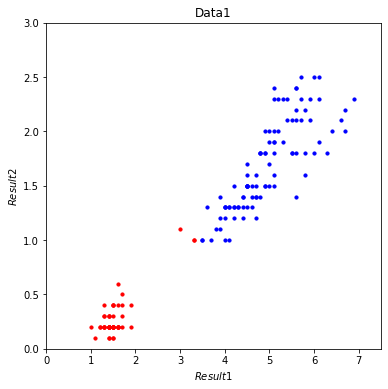

In [19]:
#scatter plot showing the 2 clusters
fig = plt.figure(figsize = (6, 6))
plt.scatter(X1x, X1y, s = 10, c = "blue")  
plt.scatter(X2x, X2y, s = 10, c = "red") 
plt.xlim(0.0, 7.5)
plt.ylim(0.0, 3.0)
plt.ylabel(r'$Result 2$')
plt.xlabel(r'$Result 1$')
plt.title("Data1") 
#plt.savefig("C:\Me\sem6\cll788\A4\Data_kmeans.jpeg")
plt.show()

# Data_GMM Visualization

In [20]:
df2 = pd.read_excel(path2)
df2 = df2.sample(frac = 1)

In [21]:
df2

,Result 1,Result 2
27,0.330887,0.384493
53,-0.323334,0.413874
196,-6.319903,-5.180163
51,1.836837,1.730376
96,2.408907,1.208716
...,...,...
107,-6.076458,-5.300536
151,-4.615293,-4.882729
62,2.098929,0.101623
190,-4.435704,-4.605324


In [22]:
df2.describe()

,Result 1,Result 2
count,200.000000,200.000000
mean,-1.810469,-1.931323
std,3.205968,3.094894
min,-7.275102,-7.347239
25%,-4.799860,-4.949301
50%,-1.807678,-2.031475
75%,1.151394,1.041118
max,4.526678,3.365225


In [23]:
#Maximum and Minimum values of Result 1 in Data_GMM
print(df2['Result 1'].max(), " ", df2['Result 1'].min())

4.52667781833885   -7.2751015423474


In [24]:
#Maximum and Minimum values of Result 2 in Data_GMM
print(df2['Result 2'].max(), " ", df2['Result 2'].min())

3.36522474259891   -7.34723922894497


In [25]:
#Feature matrix for Data_GMM
X1_gmm = df2['Result 1'].to_numpy()
X1_gmm.shape

(200,)

In [26]:
#Feature matrix for Data_GMM
X2_gmm = df2['Result 2'].to_numpy()
X2_gmm.shape

(200,)

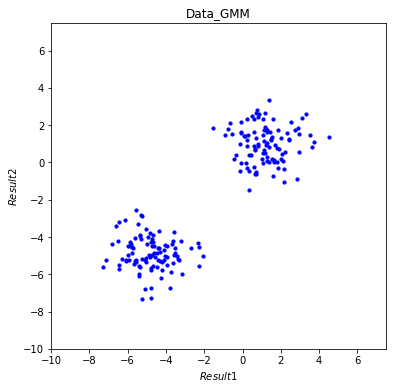

In [27]:
#Scatter Plot for Data_GMM
fig = plt.figure(figsize = (6, 6))
plt.scatter(X1_gmm, X2_gmm, s = 10, c = "blue")  
plt.xlim(-10.0, 7.5)
plt.ylim(-10.0, 7.5)
plt.ylabel(r'$Result 2$')
plt.xlabel(r'$Result 1$')
plt.title("Data_GMM") 
#plt.savefig("C:\Me\sem6\cll788\A4\Data_GMM_scatter.jpeg")
plt.show()

# Gaussian Mixture Model

In [28]:
#Number of Clusters for GMM
k_gmm = 2 

In [29]:
#random mean, covariance and pi matrices for GMM
mean = []
covariance = []
pi = []
mean.append([1.0, 1.0])
mean.append([-5.0, -5.0])
covariance.append([[1.0, 0.5], [0.5, 1.0]])
covariance.append([[2.0, 0.3], [0.3, 2.0]])
for i in range(k_gmm):
    pi.append(0.5)

mean = np.array(mean)
covariance = np.array(covariance)
pi = np.array(pi)

In [30]:
#Number of data points
m_gmm = X1_gmm.shape[0]
m_gmm

200

In [31]:
#Gaussian function to calculate Normal Probability Density Function 
def gaussian(mu, cov, x):
    
    x = np.array(x)
    x = np.reshape(x, (1, 2))
    g = np.exp((-0.5)*np.dot((x - mu), np.dot(np.linalg.inv(cov), (x - mu).T)))/(2*np.pi*np.sqrt(np.linalg.det(cov)))
    
    return g

In [32]:
epoch = 1000

In [33]:
#GMM algorithm
count = 0
while(count<epoch):
    
    count = count + 1
    r = []
    
    for i in range(m_gmm):
        
        xi = [X1_gmm[i], X2_gmm[i]]
        r0 = (pi[0]*gaussian(mean[0], covariance[0], xi))/(pi[0]*gaussian(mean[0], covariance[0], xi) + 
                                                            pi[1]*gaussian(mean[1], covariance[1], xi))
        r1 = (pi[1]*gaussian(mean[1], covariance[1], xi))/(pi[0]*gaussian(mean[0], covariance[0], xi) + 
                                                            pi[1]*gaussian(mean[1], covariance[1], xi))
        r.append([r0, r1])
    
    m0 = 0
    m1 = 0
    for i in range(len(r)):
        m0 = m0 + r[i][0]
        m1 = m1 + r[i][1]
        
    pi[0] = m0/(m_gmm)
    pi[1] = m1/(m_gmm)
    
    m00 = 0
    m01 = 0
    m10 = 0
    m11 = 0
    for i in range(m_gmm):
        m00 = m00 + r[i][0]*X1_gmm[i]
        m01 = m01 + r[i][0]*X2_gmm[i]
        m10 = m10 + r[i][1]*X1_gmm[i]
        m11 = m11 + r[i][1]*X2_gmm[i]
    
    mean[0][0] = m00/m0
    mean[0][1] = m01/m0
    mean[1][0] = m10/m1
    mean[1][1] = m11/m1
    
    
    cov0 = np.zeros((2, 2))
    cov1 = np.zeros((2, 2))
    for i in range(m_gmm):
        xii = np.array([X1_gmm[i], X2_gmm[i]])
        xii = np.reshape(xii, (1, 2))
        cov0 = cov0 + r[i][0]*np.dot(xii.T, xii)
        cov1 = cov1 + r[i][1]*np.dot(xii.T, xii)
        
    covariance[0] = cov0/m0
    covariance[1] = cov1/m1
    
    cost_gmm = 0
    for i in range(m_gmm):
        xiii = [X1_gmm[i], X2_gmm[i]]
        cost_gmm = cost_gmm + np.log(pi[0]*gaussian(mean[0], covariance[0], xiii) + 
                                                            pi[1]*gaussian(mean[1], covariance[1], xiii))
    
    if count%100 == 0:
        print(cost_gmm)

[[-858.94285637]]
[[-858.94285637]]
[[-858.94285637]]
[[-858.94285637]]
[[-858.94285637]]
[[-858.94285637]]
[[-858.94285637]]
[[-858.94285637]]
[[-858.94285637]]
[[-858.94285637]]


In [34]:
#Distribution of data points into two groups
x11_pred_gmm = []
x12_pred_gmm = []
x21_pred_gmm = []
x22_pred_gmm = []
for i in range(m_gmm):
    if r[i][0]>=r[i][1]:
        x11_pred_gmm.append(X1_gmm[i])
        x12_pred_gmm.append(X2_gmm[i])
    elif r[i][0]<r[i][1]:
        x21_pred_gmm.append(X1_gmm[i])
        x22_pred_gmm.append(X2_gmm[i])

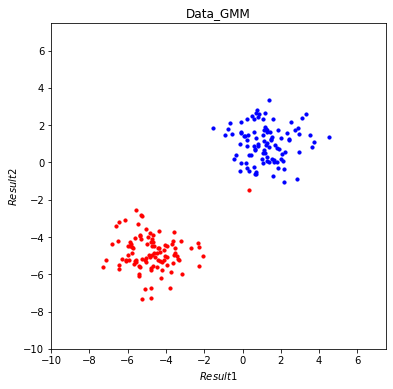

In [35]:
#Scatter plot for two clusters obtained
fig = plt.figure(figsize = (6, 6))
plt.scatter(x11_pred_gmm, x12_pred_gmm, s = 10, c = "blue")  
plt.scatter(x21_pred_gmm, x22_pred_gmm, s = 10, c = "red") 
plt.xlim(-10.0, 7.5)
plt.ylim(-10.0, 7.5)
plt.ylabel(r'$Result 2$')
plt.xlabel(r'$Result 1$')
plt.title("Data_GMM") 
#plt.savefig("C:\Me\sem6\cll788\A4\Data_GMM.jpeg")
plt.show()